In [1]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load libraries
import pandas as pd
from pandas import set_option
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from lazypredict.Supervised import LazyClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame from the dataset
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.3,random_state =123)
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     classifiers=[RandomForestClassifier, LogisticRegression, KNeighborsClassifier,MLPClassifier,DecisionTreeClassifier,SVC,xgb.XGBClassifier])
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     classifiers=[RandomForestClassifier, LogisticRegression, KNeighborsClassifier,MLPClassifier,DecisionTreeClassifier,SVC,xgb.XGBClassifier])
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 7/7 [00:00<00:00, 11.32it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.02
MLPClassifier,0.99,0.99,0.99,0.99,0.31
RandomForestClassifier,0.98,0.98,0.98,0.98,0.17
SVC,0.98,0.98,0.98,0.98,0.02
KNeighborsClassifier,0.98,0.97,0.97,0.98,0.03
XGBClassifier,0.97,0.97,0.97,0.97,0.05
DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.02


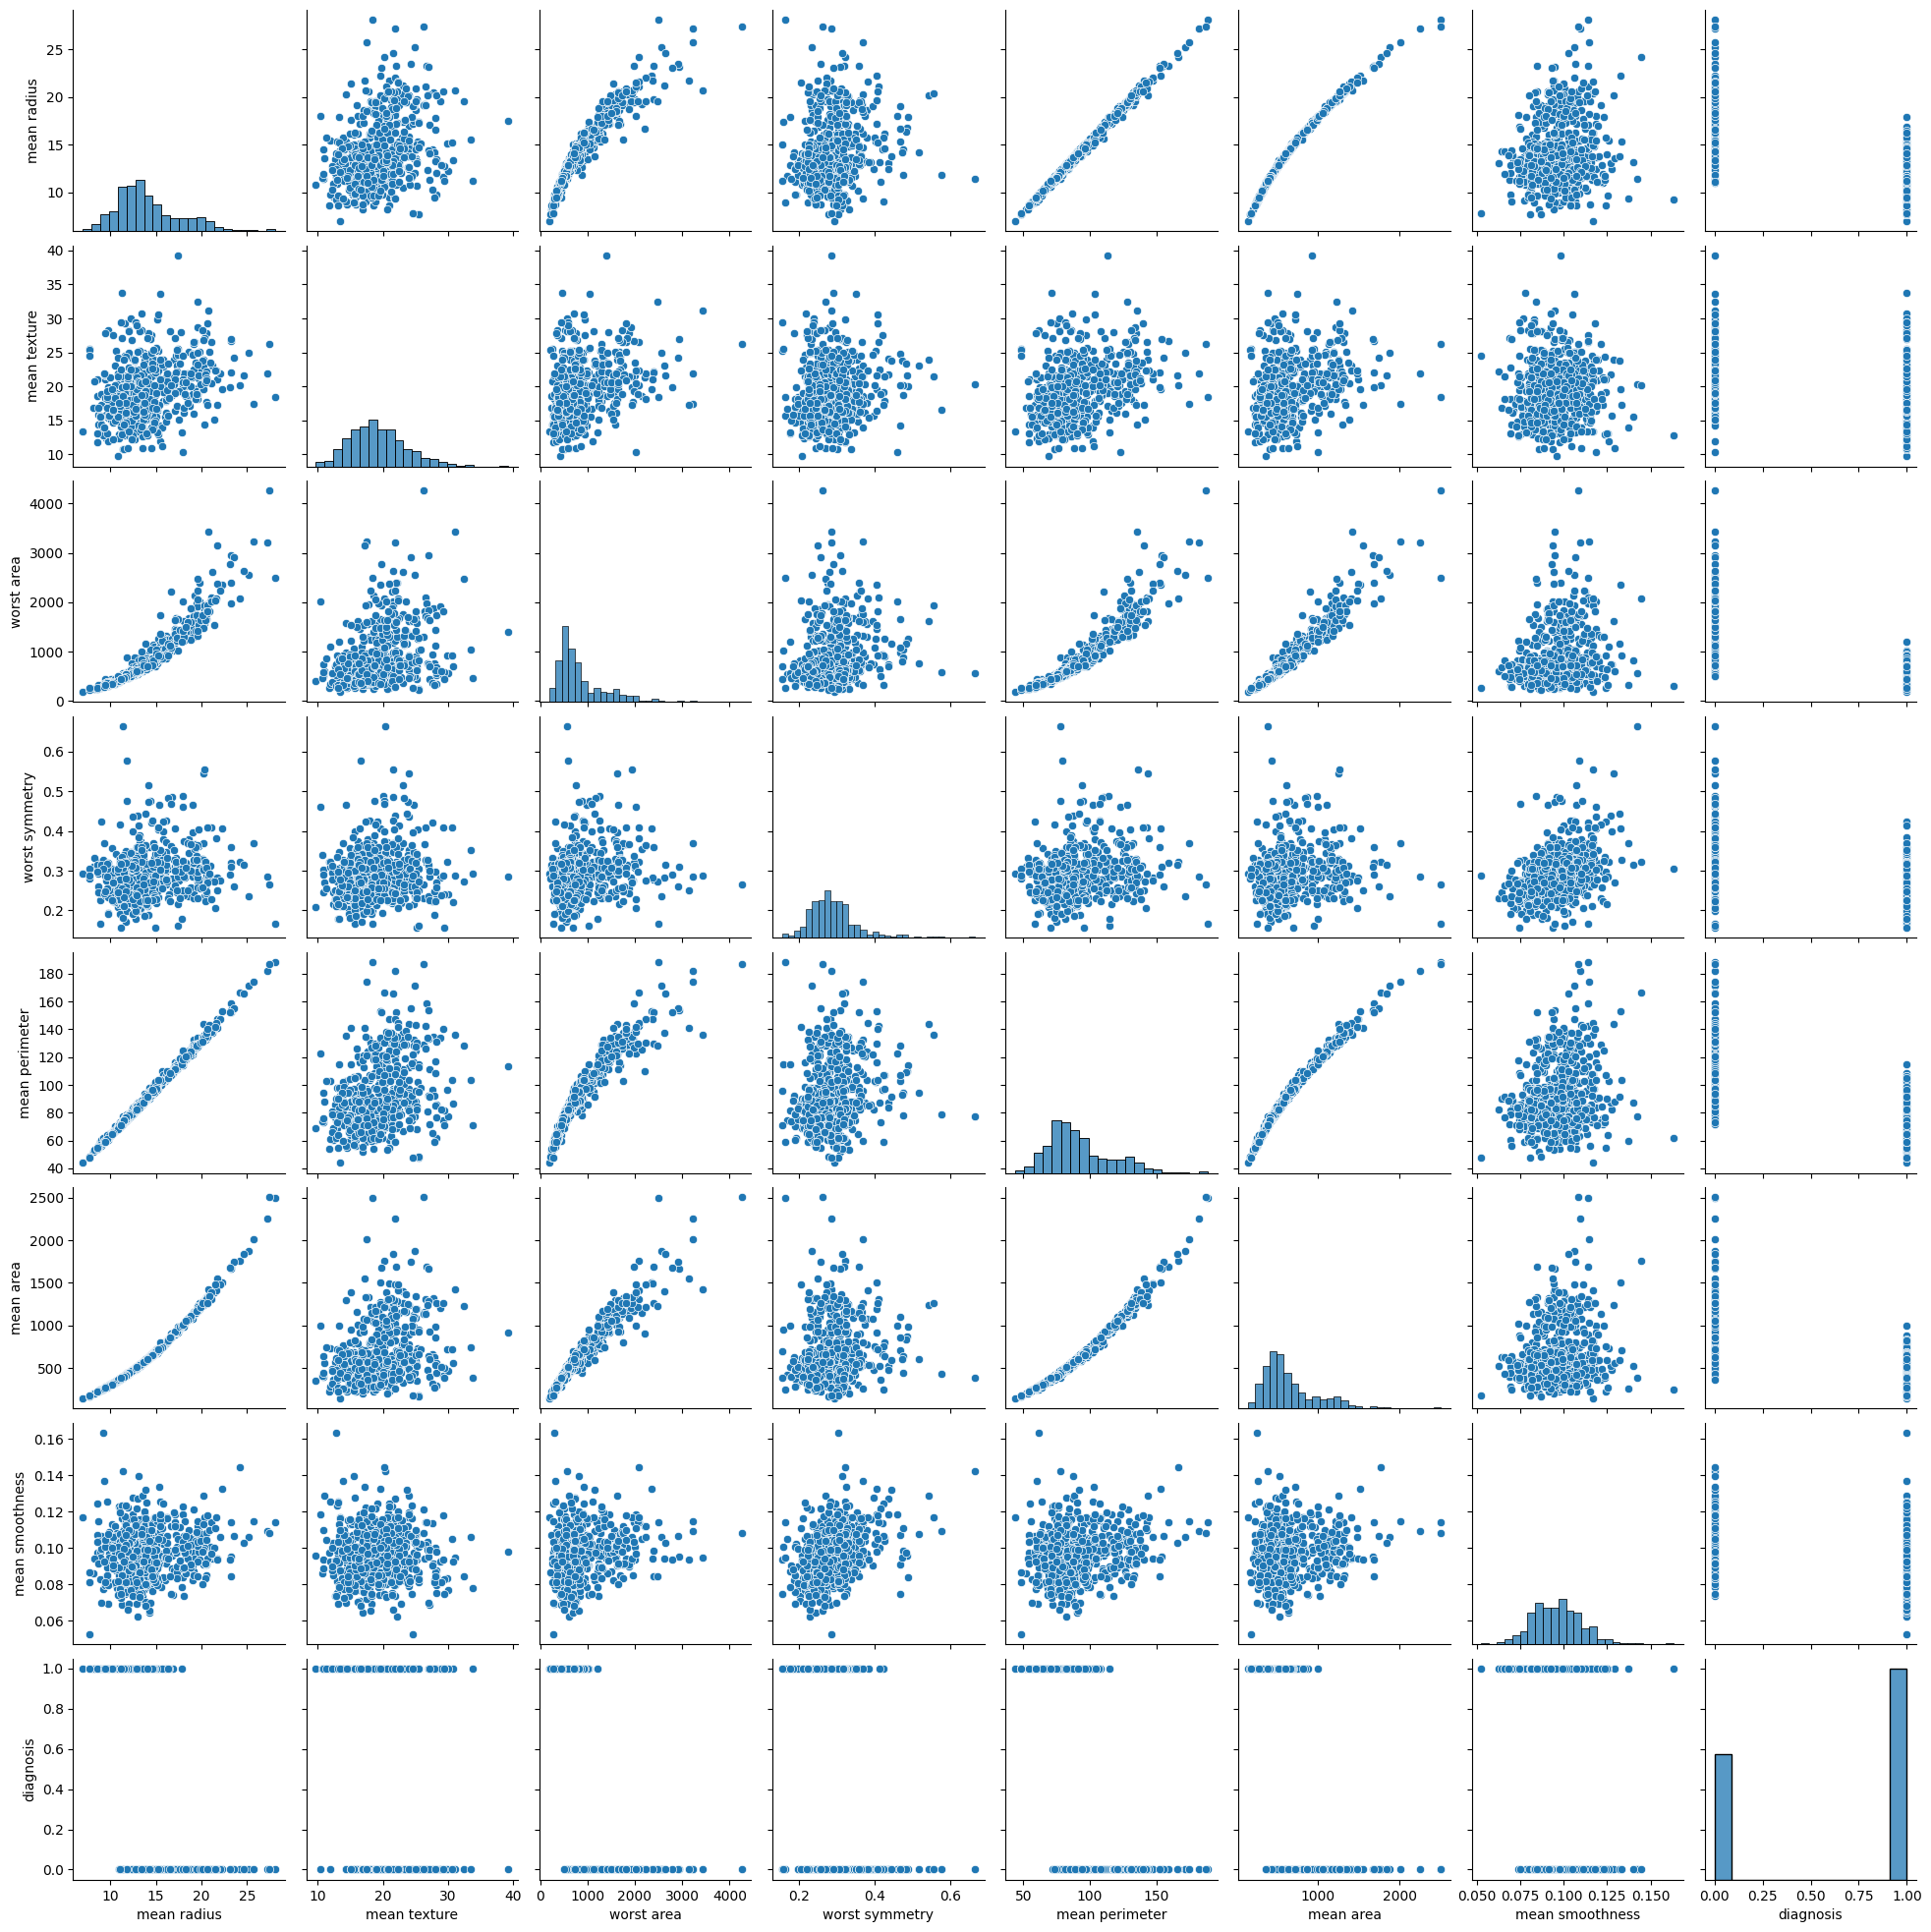

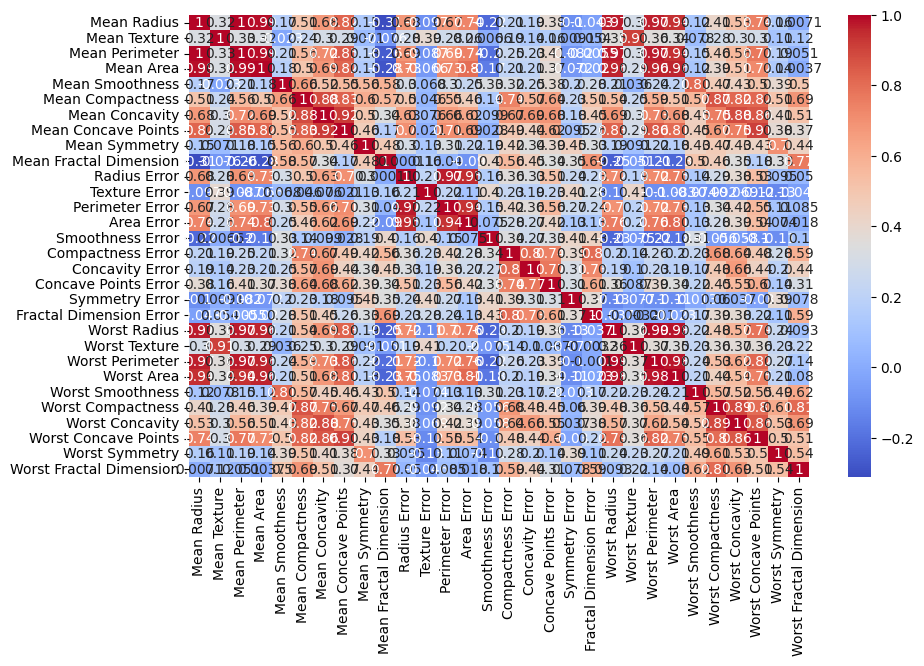

In [2]:
# Pairplot to visualize relationships between selected features and target
selected_features = ['mean radius', 'mean texture','worst area','worst symmetry',
                     'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(data[selected_features].join(target))
plt.show()
h_labels = [x.replace('_', ' ').title() for x in 
            list(data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='coolwarm', ax=ax)